# Data Mining Cup 2019
**Naufal Hilmiaji - 1301174314**

## EDA

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA,TruncatedSVD,FactorAnalysis
from sklearn.preprocessing import Normalizer

In [3]:
train = pd.read_csv('train.csv', sep='|')

In [4]:
train.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


In [5]:
data_fraud = train[train['fraud']==1]
data_not_fraud = train[train['fraud']==0]

### Check Missing Values

In [6]:
train.isnull().sum()

trustLevel                   0
totalScanTimeInSeconds       0
grandTotal                   0
lineItemVoids                0
scansWithoutRegistration     0
quantityModifications        0
scannedLineItemsPerSecond    0
valuePerSecond               0
lineItemVoidsPerPosition     0
fraud                        0
dtype: int64

In [7]:
data_fraud.shape, data_not_fraud.shape

((104, 10), (1775, 10))

### Data Description

In [9]:
data_fraud.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.0
mean,1.144231,1173.913462,51.034327,6.375000,5.865385,2.519231,0.031582,0.053622,0.251412,1.0
std,0.353025,471.260881,30.298933,3.498092,3.211199,1.654536,0.034298,0.045918,0.146440,0.0
min,1.000000,91.000000,0.260000,0.000000,0.000000,0.000000,0.011692,0.000661,0.000000,1.0
25%,1.000000,819.000000,27.072500,3.000000,3.000000,1.000000,0.016411,0.026209,0.130435,1.0
50%,1.000000,1309.500000,48.670000,6.000000,7.000000,2.000000,0.020436,0.043697,0.245000,1.0
75%,1.000000,1540.500000,76.862500,10.000000,8.250000,4.000000,0.033966,0.071838,0.379721,1.0
max,2.000000,1830.000000,99.820000,11.000000,10.000000,5.000000,0.307692,0.230802,0.578947,1.0


In [10]:
data_not_fraud.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.0
mean,3.534085,917.988169,50.854541,5.416901,4.847887,2.525634,0.059693,0.210424,0.774348,0.0
std,1.664282,530.102033,28.867495,3.442022,3.127228,1.698295,0.286364,1.277445,1.359578,0.0
min,1.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.000548,0.000007,0.000000,0.0
25%,2.000000,466.500000,25.865000,2.000000,2.000000,1.000000,0.007916,0.028089,0.163333,0.0
50%,3.000000,916.000000,51.260000,5.000000,5.000000,3.000000,0.015873,0.055407,0.363636,0.0
75%,5.000000,1374.000000,77.350000,8.000000,7.000000,4.000000,0.032378,0.111690,0.714286,0.0
max,6.000000,1831.000000,99.960000,11.000000,10.000000,5.000000,6.666667,37.870000,11.000000,0.0


### Decompose and Render

In [11]:
pca = FactorAnalysis(n_components=2)
pca.fit(train.drop('fraud',axis=1))
transformer = Normalizer().fit(train.drop('fraud',axis=1)) # fit does nothing.

In [12]:
fraud_decomposed = pca.transform(transformer.transform(data_fraud.drop('fraud',axis=1)))
not_fraud_decomposed = pca.transform(transformer.transform(data_not_fraud.drop('fraud',axis=1)))

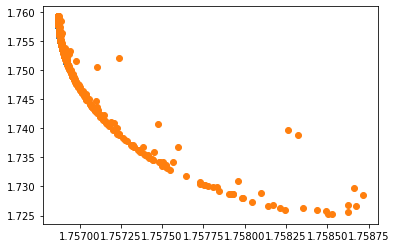

In [13]:
plt.scatter(fraud_decomposed[:,0], fraud_decomposed[:,1],marker='^')
plt.scatter(not_fraud_decomposed[:,0], not_fraud_decomposed[:,1],marker='o')
plt.show()

In [14]:
train.drop('fraud',axis=1).head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111


Conclusion: there are no nans, statistics separate two classes very well, decomposition does not work.

### Evaluating the distribution of features on the train and test

In [15]:
train_data = pd.read_csv("train.csv",sep='|')
test_data = pd.read_csv("test.csv",sep='|')

In [16]:
train_data.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,3.401809,932.153273,50.864492,5.469931,4.904204,2.525279,0.058138,0.201746,0.745404,0.055349
std,1.709404,530.144640,28.940202,3.451169,3.139697,1.695472,0.278512,1.242135,1.327241,0.228720
min,1.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.000548,0.000007,0.000000,0.000000
25%,2.000000,474.500000,25.965000,2.000000,2.000000,1.000000,0.008384,0.027787,0.160000,0.000000
50%,3.000000,932.000000,51.210000,5.000000,5.000000,3.000000,0.016317,0.054498,0.350000,0.000000
75%,5.000000,1397.000000,77.285000,8.000000,8.000000,4.000000,0.032594,0.107313,0.666667,0.000000
max,6.000000,1831.000000,99.960000,11.000000,10.000000,5.000000,6.666667,37.870000,11.000000,1.000000


In [17]:
test_data.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
count,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000
mean,3.503257,915.608772,49.988990,5.495926,5.001281,2.499015,0.068054,0.222182,0.735190
std,1.707662,528.772880,28.873426,3.447683,3.163795,1.708182,0.521092,1.717867,1.320235
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000546,0.000000,0.000000
25%,2.000000,458.000000,24.930000,3.000000,2.000000,1.000000,0.008682,0.027348,0.160000
50%,4.000000,916.000000,50.030000,5.000000,5.000000,2.000000,0.016940,0.054550,0.352941
75%,5.000000,1374.000000,75.020000,8.000000,8.000000,4.000000,0.033929,0.109091,0.692308
max,6.000000,1831.000000,99.990000,11.000000,10.000000,5.000000,30.000000,99.710000,11.000000


According to statistics, everything is the same, except for *scannedLineItemsPerSecond* and *valuePerSecond*

/opt/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valuePerSecond', ylabel='Density'>

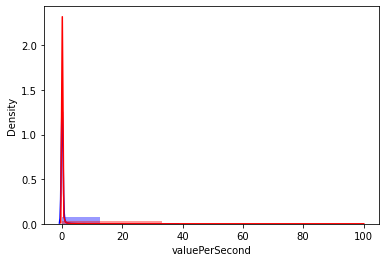

In [23]:
sns.distplot(train_data['valuePerSecond'],bins=3,color="b")
sns.distplot(test_data['valuePerSecond'],bins=3,color="r")

/opt/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='scannedLineItemsPerSecond', ylabel='Density'>

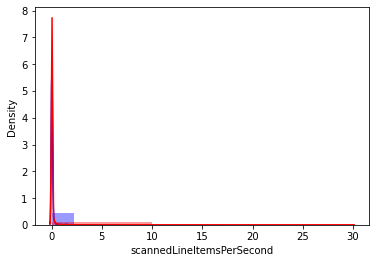

In [24]:
sns.distplot(train_data['scannedLineItemsPerSecond'],bins=3,color="b")
sns.distplot(test_data['scannedLineItemsPerSecond'],bins=3,color="r")

/opt/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trustLevel', ylabel='Density'>

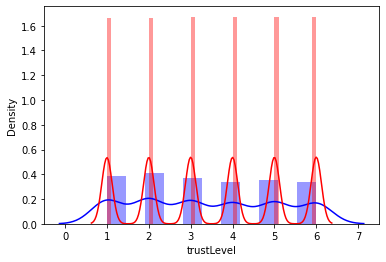

In [25]:
sns.distplot(train_data['trustLevel'],color="b")
sns.distplot(test_data['trustLevel'],color="r")

/opt/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='totalScanTimeInSeconds', ylabel='Density'>

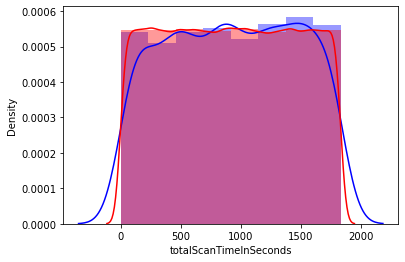

In [26]:
sns.distplot(train_data['totalScanTimeInSeconds'],bins=8,color="b")
sns.distplot(test_data['totalScanTimeInSeconds'],bins=8,color="r")

/opt/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='grandTotal', ylabel='Density'>

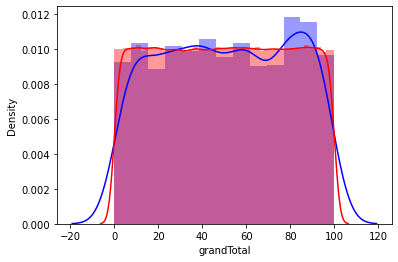

In [27]:
sns.distplot(train_data['grandTotal'],color="b")
sns.distplot(test_data['grandTotal'],color="r")

/opt/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lineItemVoids', ylabel='Density'>

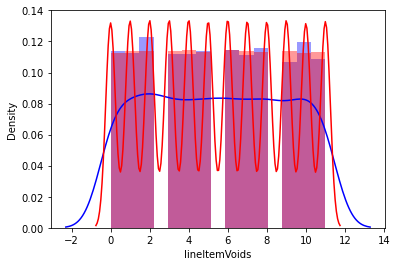

In [28]:
sns.distplot(train_data['lineItemVoids'],bins=15,color="b")
sns.distplot(test_data['lineItemVoids'],bins=15,color="r")

/opt/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='scansWithoutRegistration', ylabel='Density'>

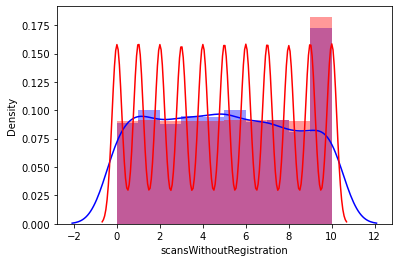

In [29]:
sns.distplot(train_data['scansWithoutRegistration'],bins=10,color="b")
sns.distplot(test_data['scansWithoutRegistration'],bins=10,color="r")

/opt/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quantityModifications', ylabel='Density'>

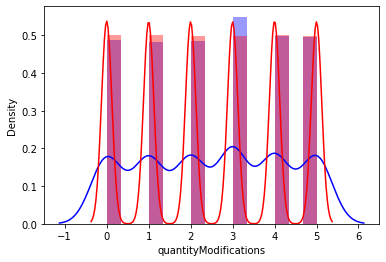

In [30]:
sns.distplot(train_data['quantityModifications'],bins=15,color="b")
sns.distplot(test_data['quantityModifications'],bins=15,color="r")

/opt/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lineItemVoidsPerPosition', ylabel='Density'>

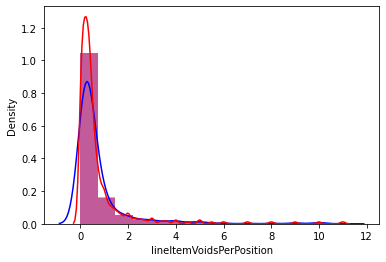

In [31]:
sns.distplot(train_data['lineItemVoidsPerPosition'],bins=15,color="b")
sns.distplot(test_data['lineItemVoidsPerPosition'],bins=15,color="r")

Conclusion: scannedLineItemsPerSecond and valuePerSecond should not be used.

### Detect Outliers

In [32]:
for c in test_data.columns:
    if test_data[test_data[c] <= 0].shape[0] > 0:
        print(c)

grandTotal
lineItemVoids
scansWithoutRegistration
quantityModifications
valuePerSecond
lineItemVoidsPerPosition


In [37]:
for c in test_data.columns:
    if train_data[train_data[c] <= 0].shape[0] > 0:
        print(c)

lineItemVoids
scansWithoutRegistration
quantityModifications
lineItemVoidsPerPosition


In [38]:
test_data[test_data['grandTotal'] <= 0].head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
13695,4,724,0.0,0,2,4,0.041436,0.0,0.000000
19792,3,1228,0.0,11,5,4,0.006515,0.0,1.375000
29990,4,1744,0.0,9,5,1,0.010321,0.0,0.500000
30187,6,75,0.0,8,0,1,0.346667,0.0,0.307692
30423,6,767,0.0,9,5,1,0.006519,0.0,1.800000


The test contains examples with fields grandTotal and valuePerSecond = 0 (the same ones)

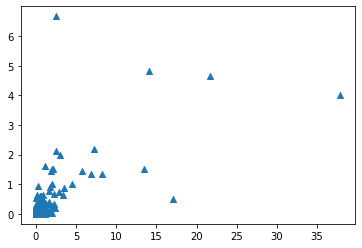

In [39]:
plt.scatter(train_data['valuePerSecond'], train_data['scannedLineItemsPerSecond'],marker='^')
plt.show()

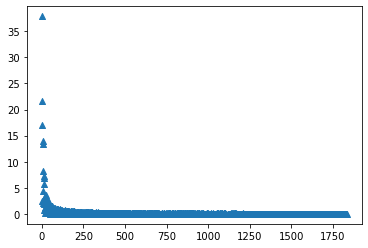

In [40]:
plt.scatter(train_data['totalScanTimeInSeconds'], train_data['valuePerSecond'],marker='^')
plt.show()

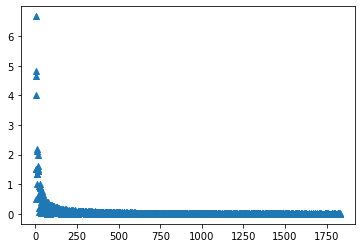

In [41]:
plt.scatter(train_data['totalScanTimeInSeconds'], train_data['scannedLineItemsPerSecond'],marker='^')
plt.show()

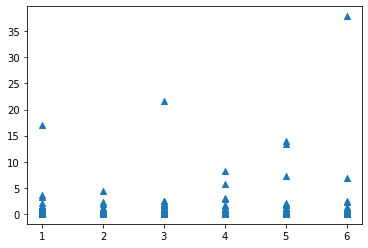

In [42]:
plt.scatter(train_data['trustLevel'], train_data['valuePerSecond'],marker='^')
plt.show()

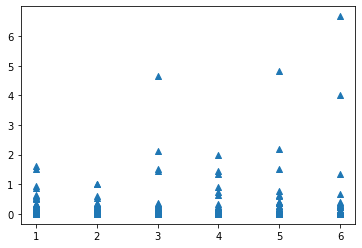

In [43]:
plt.scatter(train_data['trustLevel'], train_data['scannedLineItemsPerSecond'],marker='^')
plt.show()

Outliers in the train are detected on the scannedLineItemsPerSecond, valuePerSecond signs

In [44]:
train.columns

Index(['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids',
       'scansWithoutRegistration', 'quantityModifications',
       'scannedLineItemsPerSecond', 'valuePerSecond',
       'lineItemVoidsPerPosition', 'fraud'],
      dtype='object')

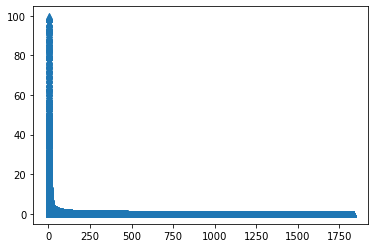

In [45]:
plt.scatter(test_data['totalScanTimeInSeconds'], test_data['valuePerSecond'],marker='^')
plt.show()

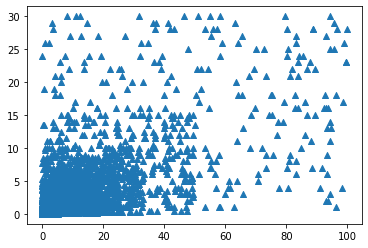

In [46]:
plt.scatter(test_data['valuePerSecond'], test_data['scannedLineItemsPerSecond'],marker='^')
plt.show()

Outliers in the test are also detected on the scannedLineItemsPerSecond, valuePerSecond signs, but not so much